In [1]:
#Markowitz - Obtaining the Efficient Frontier  - 3 companies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('WMT_FB_BP_2014_2017.csv',index_col='Date')

In [3]:
data.head()

,WMT,FB,BP
Date,,,
2013-12-31,70.753525,54.650002,37.758350
2014-01-02,70.951355,54.709999,37.268997
2014-01-03,70.717583,54.560001,37.183540
2014-01-06,70.321945,57.200001,37.284527
2014-01-07,70.537735,57.919998,37.711742


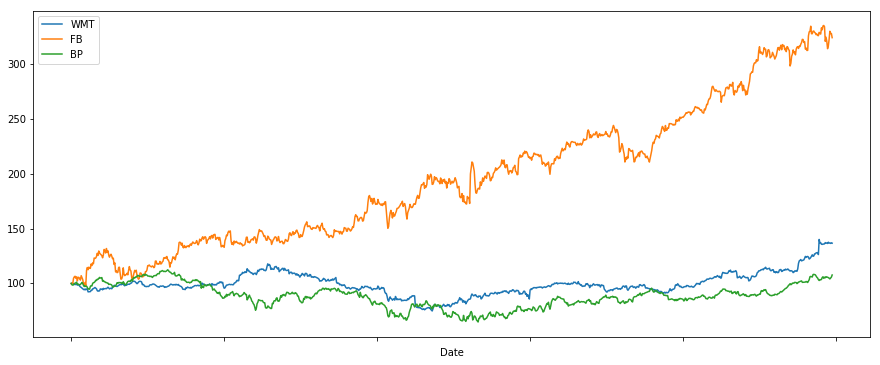

In [4]:
#Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe.
(data/data.iloc[0] * 100).plot(figsize=(15,6))

In [5]:
#Calculate their logarithmic returns.
ret = np.log(data/data.shift(1))
ret.head()

,WMT,FB,BP
Date,,,
2013-12-31,NaN,NaN,NaN
2014-01-02,0.002792,0.001097,-0.013045
2014-01-03,-0.003300,-0.002745,-0.002296
2014-01-06,-0.005610,0.047253,0.002712
2014-01-07,0.003064,0.012509,0.011393


In [6]:
ret.mean() * 250

WMT    0.078495
FB     0.295220
BP     0.018603
dtype: float64

In [7]:
ret.cov() *250

,WMT,FB,BP
WMT,0.032659,0.007449,0.005651
FB,0.007449,0.074427,0.013889
BP,0.005651,0.013889,0.056863


In [8]:
ret.corr()

,WMT,FB,BP
WMT,1.000000,0.151081,0.131138
FB,0.151081,1.000000,0.213505
BP,0.131138,0.213505,1.000000


In [9]:
#Create a variable that carries the number of assets in your portfolio.
num_assets = 3

#The portfolio need not be equally weighted. So, create a variable, called “weights”.
#Let it contain as many randomly generated values as there are assets in your portfolio.
#Don’t forget these values should be neither smaller than 0 nor equal or greater than 1!

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.42190161, 0.02178892, 0.55630947])

In [10]:
w = weights[0] + weights[1] + weights[2]
w

1.0

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [11]:
np.sum(weights * ret.mean()) * 250

0.04989855997146704

Expected Portfolio Variance:

In [12]:
np.dot(weights.T, np.dot(ret.cov() * 250, weights))

0.026572914980331937

Expected Portfolio Volatility:

In [13]:
np.sqrt(np.dot(weights.T,np.dot(ret.cov() * 250, weights)))

0.163012008699764

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [14]:
pfolio_returns = []
pfolio_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [15]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * ret.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(ret.cov() * 250, weights))))

   

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [16]:
pf_returns = np.array(pfolio_returns)
pf_volatilities = np.array(pfolio_volatilities)


Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [17]:
portfolios = pd.DataFrame({'Return':pf_returns, 'Volatility': pf_volatilities})

In [18]:
portfolios.head()

,Return,Volatility
0,0.101938,0.149160
1,0.151803,0.155925
2,0.195262,0.179464
3,0.166485,0.166099
4,0.155939,0.187879


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0,0.5,'Expected Return')

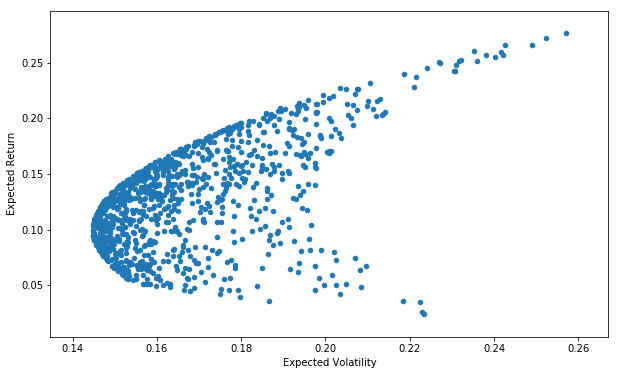

In [19]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******